<a href="https://colab.research.google.com/github/khoir-roni/colab-project/blob/main/Machine_Learning_Solutions_for_Classic_Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Solutions for Classic Problems
Saya akan memberikan contoh implementasi untuk tiga masalah klasik yang bisa langsung dijalankan di Google Colab:Kode di atas menunjukkan implementasi tiga algoritma ML untuk memecahkan masalah klasik:
## **Cara Menjalankan di Google Colab:**

1. Buka Google Colab (colab.research.google.com)
2. Buat notebook baru
3. Copy-paste kode di atas
4. Jalankan dengan `Shift + Enter`

## **Keunggulan Masing-masing:**

- **Q-Learning**: Cocok untuk environment yang bisa dimodelkan sebagai Markov Decision Process
- **Genetic Algorithm**: Baik untuk optimasi global, mudah diimplementasi
- **Ant Colony**: Efisien untuk masalah graf, konvergensi cepat

In [ ]:
# Machine Learning Solutions for Classic Problems
# Ready to run in Google Colab

import numpy as np
import matplotlib.pyplot as plt
import random
from collections import deque
import time

## 1. **Q-Learning untuk Maze Solving**
- **Masalah**: Mencari jalur terpendek dalam maze
- **Algoritma**: Reinforcement Learning (Q-Learning)
- **Cara kerja**: Agen belajar melalui trial-and-error dengan reward system
- **Output**: Visualisasi maze dan jalur optimal

1. MAZE SOLVING DENGAN Q-LEARNING
Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (4, 2), (4, 3), (4, 4)]
Path length: 9


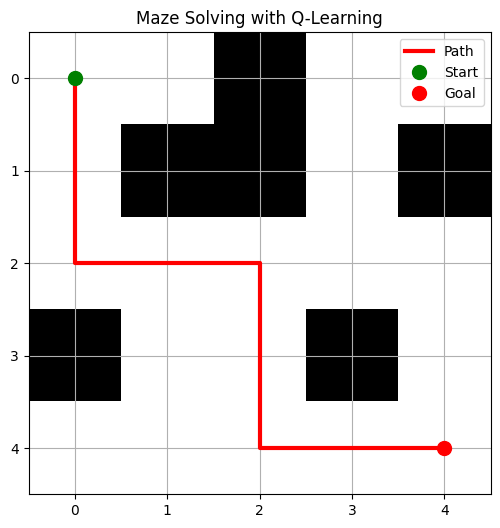

In [ ]:

# ===== 1. MAZE SOLVING DENGAN Q-LEARNING =====
print("="*50)
print("1. MAZE SOLVING DENGAN Q-LEARNING")
print("="*50)


class MazeQLearning:
    def __init__(self, maze):
        self.maze = np.array(maze)
        self.rows, self.cols = self.maze.shape
        self.q_table = np.zeros((self.rows, self.cols, 4))  # 4 actions: up, down, left, right
        self.actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # up, down, left, right

    def is_valid_move(self, row, col):
        return 0 <= row < self.rows and 0 <= col < self.cols and self.maze[row][col] != 1

    def get_reward(self, row, col, goal):
        if (row, col) == goal:
            return 100  # Goal reached
        elif self.maze[row][col] == 1:
            return -100  # Wall hit
        else:
            return -1  # Step penalty

    def train(self, start, goal, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
        for episode in range(episodes):
            current_pos = start

            while current_pos != goal:
                row, col = current_pos

                # Epsilon-greedy action selection
                if random.random() < epsilon:
                    action = random.randint(0, 3)
                else:
                    action = np.argmax(self.q_table[row][col])

                # Take action
                new_row = row + self.actions[action][0]
                new_col = col + self.actions[action][1]

                if self.is_valid_move(new_row, new_col):
                    reward = self.get_reward(new_row, new_col, goal)

                    # Q-learning update
                    old_q = self.q_table[row][col][action]
                    next_max = np.max(self.q_table[new_row][new_col])
                    new_q = old_q + alpha * (reward + gamma * next_max - old_q)
                    self.q_table[row][col][action] = new_q

                    current_pos = (new_row, new_col)
                else:
                    # Invalid move, penalty
                    self.q_table[row][col][action] -= 10

    def find_path(self, start, goal):
        path = [start]
        current_pos = start

        while current_pos != goal:
            row, col = current_pos
            action = np.argmax(self.q_table[row][col])
            new_row = row + self.actions[action][0]
            new_col = col + self.actions[action][1]

            if self.is_valid_move(new_row, new_col):
                current_pos = (new_row, new_col)
                path.append(current_pos)
            else:
                break

        return path

# Contoh maze (0=jalan, 1=tembok)
maze = [
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 0, 0, 0]
]

# Jalankan Q-Learning
start = (0, 0)
goal = (4, 4)
maze_solver = MazeQLearning(maze)
maze_solver.train(start, goal, episodes=1000)
path = maze_solver.find_path(start, goal)

print(f"Path found: {path}")
print(f"Path length: {len(path)}")

# Visualisasi maze
plt.figure(figsize=(8, 6))
maze_array = np.array(maze)
plt.imshow(maze_array, cmap='binary')
if len(path) > 1:
    path_x = [p[1] for p in path]
    path_y = [p[0] for p in path]
    plt.plot(path_x, path_y, 'r-', linewidth=3, label='Path')
plt.plot(start[1], start[0], 'go', markersize=10, label='Start')
plt.plot(goal[1], goal[0], 'ro', markersize=10, label='Goal')
plt.title('Maze Solving with Q-Learning')
plt.legend()
plt.grid(True)
plt.show()


## 2. **Genetic Algorithm untuk TSP**
- **Masalah**: Traveling Salesman Problem
- **Algoritma**: Evolutionary Algorithm
- **Cara kerja**: Simulasi evolusi dengan selection, crossover, dan mutation
- **Output**: Rute terpendek dan grafik konvergensi


2. TRAVELING SALESMAN PROBLEM DENGAN GENETIC ALGORITHM
Generation 0: Best distance = 395.34
Generation 100: Best distance = 305.58
Generation 200: Best distance = 305.58

Best route: [4, 3, 5, 0, 8, 1, 7, 9, 6, 2]
Best distance: 305.58


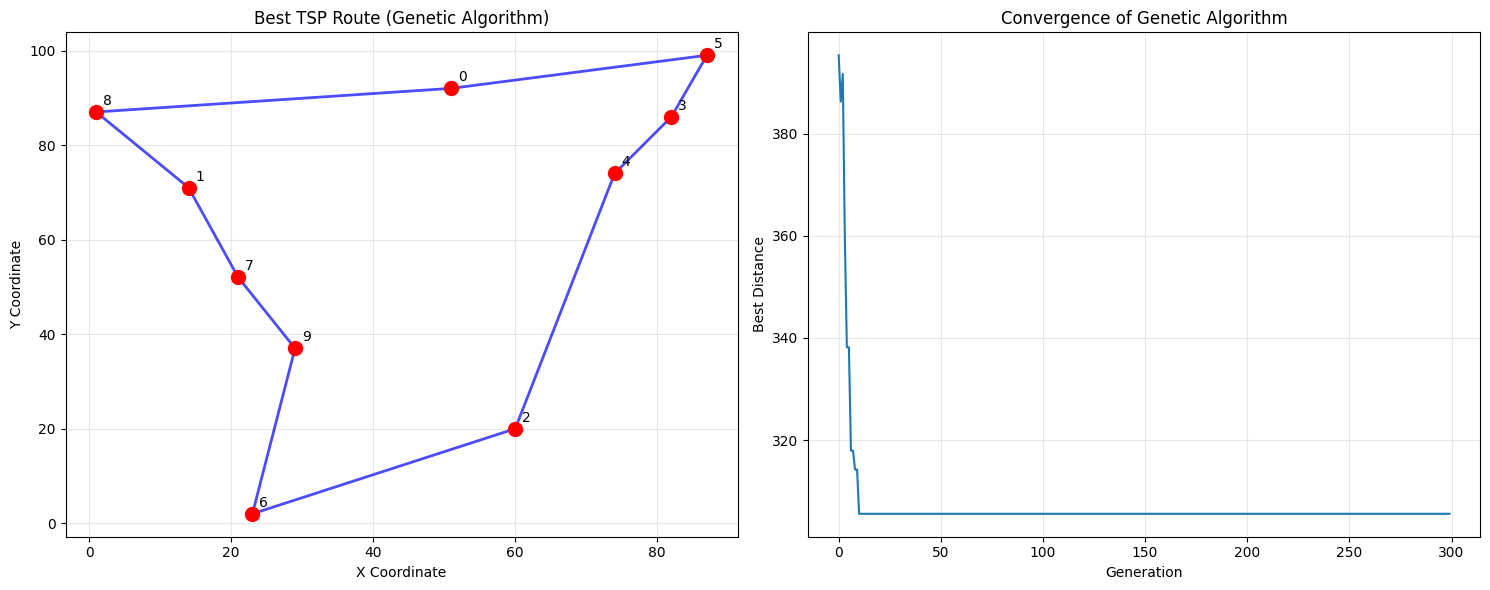

In [ ]:

# ===== 2. TRAVELING SALESMAN PROBLEM DENGAN GENETIC ALGORITHM =====
print("\n" + "="*50)
print("2. TRAVELING SALESMAN PROBLEM DENGAN GENETIC ALGORITHM")
print("="*50)

class TSPGeneticAlgorithm:
    def __init__(self, cities, population_size=100, mutation_rate=0.02):
        self.cities = cities
        self.num_cities = len(cities)
        self.population_size = population_size
        self.mutation_rate = mutation_rate

    def calculate_distance(self, city1, city2):
        return np.sqrt((city1[0] - city2[0])**2 + (city1[1] - city2[1])**2)

    def calculate_route_distance(self, route):
        total_distance = 0
        for i in range(len(route)):
            from_city = route[i]
            to_city = route[(i + 1) % len(route)]
            total_distance += self.calculate_distance(self.cities[from_city], self.cities[to_city])
        return total_distance

    def create_initial_population(self):
        population = []
        for _ in range(self.population_size):
            route = list(range(self.num_cities))
            random.shuffle(route)
            population.append(route)
        return population

    def selection(self, population, fitness_scores):
        # Tournament selection
        selected = []
        for _ in range(self.population_size):
            tournament_size = 5
            tournament = random.sample(list(zip(population, fitness_scores)), tournament_size)
            winner = min(tournament, key=lambda x: x[1])
            selected.append(winner[0])
        return selected

    def crossover(self, parent1, parent2):
        # Order crossover (OX)
        start = random.randint(0, len(parent1) - 1)
        end = random.randint(start, len(parent1) - 1)

        child = [-1] * len(parent1)
        child[start:end+1] = parent1[start:end+1]

        remaining = [city for city in parent2 if city not in child]
        j = 0
        for i in range(len(child)):
            if child[i] == -1:
                child[i] = remaining[j]
                j += 1

        return child

    def mutate(self, route):
        if random.random() < self.mutation_rate:
            i, j = random.sample(range(len(route)), 2)
            route[i], route[j] = route[j], route[i]
        return route

    def solve(self, generations=500):
        population = self.create_initial_population()
        best_distances = []

        for generation in range(generations):
            # Calculate fitness
            fitness_scores = [self.calculate_route_distance(route) for route in population]

            # Track best solution
            best_distance = min(fitness_scores)
            best_distances.append(best_distance)

            if generation % 100 == 0:
                print(f"Generation {generation}: Best distance = {best_distance:.2f}")

            # Selection
            selected = self.selection(population, fitness_scores)

            # Create new population
            new_population = []
            for i in range(0, len(selected), 2):
                parent1 = selected[i]
                parent2 = selected[(i + 1) % len(selected)]

                child1 = self.crossover(parent1, parent2)
                child2 = self.crossover(parent2, parent1)

                child1 = self.mutate(child1)
                child2 = self.mutate(child2)

                new_population.extend([child1, child2])

            population = new_population[:self.population_size]

        # Return best solution
        final_fitness = [self.calculate_route_distance(route) for route in population]
        best_route = population[np.argmin(final_fitness)]

        return best_route, best_distances

# Generate random cities
np.random.seed(42)
num_cities = 10
cities = [(np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(num_cities)]

# Solve TSP
tsp_solver = TSPGeneticAlgorithm(cities)
best_route, distances_history = tsp_solver.solve(generations=300)

print(f"\nBest route: {best_route}")
print(f"Best distance: {tsp_solver.calculate_route_distance(best_route):.2f}")

# Visualisasi
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot cities and route
city_x = [city[0] for city in cities]
city_y = [city[1] for city in cities]
ax1.scatter(city_x, city_y, c='red', s=100, zorder=5)

# Plot route
route_x = [cities[i][0] for i in best_route] + [cities[best_route[0]][0]]
route_y = [cities[i][1] for i in best_route] + [cities[best_route[0]][1]]
ax1.plot(route_x, route_y, 'b-', linewidth=2, alpha=0.7)

# Label cities
for i, city in enumerate(cities):
    ax1.annotate(str(i), (city[0], city[1]), xytext=(5, 5), textcoords='offset points')

ax1.set_title('Best TSP Route (Genetic Algorithm)')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax1.grid(True, alpha=0.3)

# Plot convergence
ax2.plot(distances_history)
ax2.set_title('Convergence of Genetic Algorithm')
ax2.set_xlabel('Generation')
ax2.set_ylabel('Best Distance')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 3. **Ant Colony Optimization untuk TSP**
- **Masalah**: Shortest path problem
- **Algoritma**: Swarm Intelligence
- **Cara kerja**: Simulasi perilaku koloni semut dengan pheromone trails
- **Output**: Perbandingan dengan GA dan visualisasi


3. SHORTEST PATH DENGAN ANT COLONY OPTIMIZATION
Iteration 0: Best distance = 325.81
Iteration 20: Best distance = 305.58
Iteration 40: Best distance = 305.58
Iteration 60: Best distance = 305.58
Iteration 80: Best distance = 305.58
Iteration 100: Best distance = 305.58
Iteration 120: Best distance = 305.58
Iteration 140: Best distance = 305.58
Iteration 160: Best distance = 305.58
Iteration 180: Best distance = 305.58

ACO Best route: [0, np.int64(8), np.int64(1), np.int64(7), np.int64(9), np.int64(6), np.int64(2), np.int64(4), np.int64(3), np.int64(5)]
ACO Best distance: 305.58


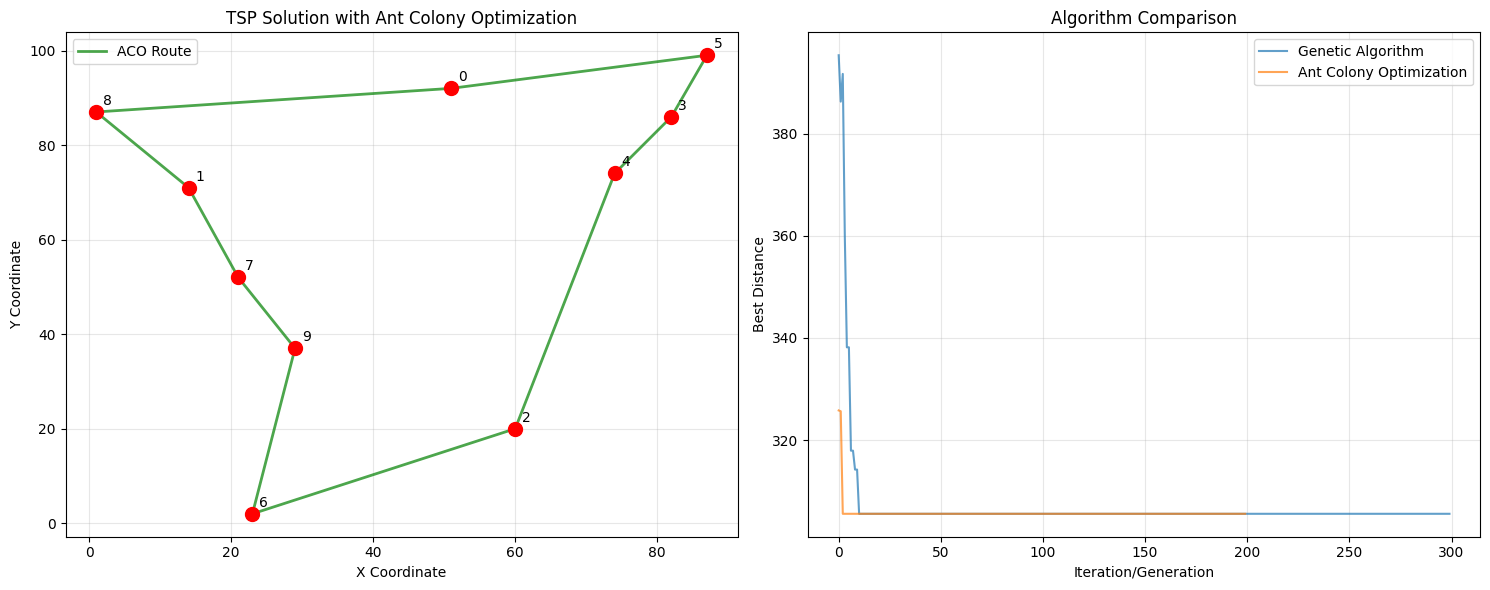


SUMMARY RESULTS
Maze Solving (Q-Learning): Path length = 9
TSP Genetic Algorithm: Best distance = 305.58
TSP Ant Colony Optimization: Best distance = 305.58

All algorithms successfully solved their respective problems!


In [ ]:


# ===== 3. SHORTEST PATH DENGAN ANT COLONY OPTIMIZATION =====
print("\n" + "="*50)
print("3. SHORTEST PATH DENGAN ANT COLONY OPTIMIZATION")
print("="*50)

class AntColonyOptimization:
    def __init__(self, distances, num_ants=10, alpha=1.0, beta=2.0, evaporation=0.1, Q=100):
        self.distances = np.array(distances)
        self.num_cities = len(distances)
        self.num_ants = num_ants
        self.alpha = alpha  # pheromone importance
        self.beta = beta    # distance importance
        self.evaporation = evaporation
        self.Q = Q

        # Initialize pheromone matrix
        self.pheromones = np.ones((self.num_cities, self.num_cities)) * 0.1

    def select_next_city(self, current_city, unvisited, ant_id):
        probabilities = []

        for city in unvisited:
            pheromone = self.pheromones[current_city][city] ** self.alpha
            distance = (1.0 / self.distances[current_city][city]) ** self.beta
            probabilities.append(pheromone * distance)

        probabilities = np.array(probabilities)
        probabilities = probabilities / probabilities.sum()

        # Roulette wheel selection
        return np.random.choice(unvisited, p=probabilities)

    def solve(self, iterations=100):
        best_route = None
        best_distance = float('inf')
        best_distances = []

        for iteration in range(iterations):
            routes = []
            distances = []

            # Each ant constructs a route
            for ant in range(self.num_ants):
                current_city = 0  # Start from city 0
                route = [current_city]
                unvisited = set(range(1, self.num_cities))

                while unvisited:
                    next_city = self.select_next_city(current_city, list(unvisited), ant)
                    route.append(next_city)
                    unvisited.remove(next_city)
                    current_city = next_city

                # Calculate route distance
                route_distance = sum(self.distances[route[i]][route[i+1]]
                                   for i in range(len(route)-1))
                route_distance += self.distances[route[-1]][route[0]]  # Return to start

                routes.append(route)
                distances.append(route_distance)

                # Update best solution
                if route_distance < best_distance:
                    best_distance = route_distance
                    best_route = route.copy()

            best_distances.append(best_distance)

            if iteration % 20 == 0:
                print(f"Iteration {iteration}: Best distance = {best_distance:.2f}")

            # Update pheromones
            self.pheromones *= (1 - self.evaporation)  # Evaporation

            # Add pheromones from all ants
            for i, route in enumerate(routes):
                pheromone_deposit = self.Q / distances[i]
                for j in range(len(route)):
                    from_city = route[j]
                    to_city = route[(j + 1) % len(route)]
                    self.pheromones[from_city][to_city] += pheromone_deposit
                    self.pheromones[to_city][from_city] += pheromone_deposit

        return best_route, best_distances

# Create distance matrix for the same cities
distance_matrix = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distance_matrix[i][j] = np.sqrt((cities[i][0] - cities[j][0])**2 +
                                          (cities[i][1] - cities[j][1])**2)

# Solve with ACO
aco_solver = AntColonyOptimization(distance_matrix, num_ants=20)
aco_route, aco_distances = aco_solver.solve(iterations=200)

print(f"\nACO Best route: {aco_route}")
print(f"ACO Best distance: {aco_distances[-1]:.2f}")

# Visualisasi perbandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot ACO route
city_x = [city[0] for city in cities]
city_y = [city[1] for city in cities]
ax1.scatter(city_x, city_y, c='red', s=100, zorder=5)

# Plot ACO route
aco_route_x = [cities[i][0] for i in aco_route] + [cities[aco_route[0]][0]]
aco_route_y = [cities[i][1] for i in aco_route] + [cities[aco_route[0]][1]]
ax1.plot(aco_route_x, aco_route_y, 'g-', linewidth=2, alpha=0.7, label='ACO Route')

# Label cities
for i, city in enumerate(cities):
    ax1.annotate(str(i), (city[0], city[1]), xytext=(5, 5), textcoords='offset points')

ax1.set_title('TSP Solution with Ant Colony Optimization')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Compare convergence
ax2.plot(distances_history, label='Genetic Algorithm', alpha=0.7)
ax2.plot(aco_distances, label='Ant Colony Optimization', alpha=0.7)
ax2.set_title('Algorithm Comparison')
ax2.set_xlabel('Iteration/Generation')
ax2.set_ylabel('Best Distance')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary
print("\n" + "="*50)
print("SUMMARY RESULTS")
print("="*50)
print(f"Maze Solving (Q-Learning): Path length = {len(path)}")
print(f"TSP Genetic Algorithm: Best distance = {tsp_solver.calculate_route_distance(best_route):.2f}")
print(f"TSP Ant Colony Optimization: Best distance = {aco_distances[-1]:.2f}")
print("\nAll algorithms successfully solved their respective problems!")